<a href="https://colab.research.google.com/github/YudyMancipe/Data_Analysis_Portfolio/blob/main/bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nombre**:

Yudy Alexandra Mancipe Diaz



 **Problema a Resolver**

La institución bancaria necesita identificar las características y patrones de los clientes que aumentan la probabilidad de que suscriban un depósito a plazo fijo, con el objetivo de optimizar futuras campañas de marketing directo. Actualmente, no existe un modelo claro para predecir estos comportamientos ni para priorizar recursos de manera eficiente.

### **Objetivos**

1. Identificar patrones y tendencias en las características demográficas, financieras y de interacción con los clientes.

2. Evaluar la importancia de variables clave como duración de llamadas, historial de contacto y características económicas externas.

3. Aplicar un modelo de regresión lineal simple para identificar qué variables tienen una relación directa y significativa con la decisión de suscripción a un depósito a plazo fijo.

4. Construir un modelo de regresión lineal múltiple que considere varias variables relevantes para predecir la probabilidad de suscripción.

5. Implementar un modelo de regresión polinomial para capturar posibles relaciones no lineales entre las características de los clientes y la variable objetivo, mejorando la capacidad predictiva del modelo.

6. Determinar cuáles características de los clientes (por ejemplo, edad, nivel educativo, duración de la llamada, estado civil, entre otras) tienen mayor impacto o influencia en la probabilidad de que un cliente decida suscribirse a un depósito a plazo fijo

## **Meta**

Construir un modelo que permita identificar los factores que influyen en la decisión de suscribir un depósito a plazo fijo por parte del cliente.

## **Criterio de Éxito**

1. El modelo predictivo debe ser capaz de identificar clientes con alta probabilidad de suscripción con una precisión aceptable.
2. los resultados obtenidos del análisis y los modelos predictivos deben ser útiles y aplicables de manera práctica, para que la institución pueda tomar decisiones estratégicas

# **Justificación de elección del proyecto:**

La elección de este proyecto responde a la oportunidad de trabajar con un conjunto de datos más amplio y variables diversas, lo que enriquece la experiencia de aprendizaje, permite explorar relaciones complejas entre variables y fortalece nuestras habilidades en el desarrollo de modelos predictivos aplicados a problemas reales.

## Paso 1: Cargar el archivo y analizar los datos

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# prompt: importar datos del archivo "bank_marketing_test.csv"

data = pd.read_csv('bank_marketing_test.csv')
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info() #accediendo a informacion de variables
data.describe() #accediendo a estadisticas descriptivas
data.head() #accediendo a las primeras 5 filas
data.tail() #accediendo a las ultimas 5 filas
data.columns #accediendo a los nombres de las columnas
#data.dtypes #accediendo a los tipos de variables

In [ ]:
for col in data.select_dtypes(include='object').columns: #se define ciclo for que recorra las columnas
    print(f"\nColumna: {col}") #se hace impresion de columnas con salto de linea
    print(data[col].value_counts()) #imprimiemdo valors unicos y frecuencias por columna

In [ ]:

# Calcular la distribución de trabajos
Trabajo = data['job'].value_counts()

# Crear el gráfico de barras
ax = Trabajo.plot(kind='bar', color='blue', title='Distribución por Trabajo')  # Cambiar color a rojo claro

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Etiqueta con el valor de la altura
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordenadas
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Añadir etiquetas a los ejes
plt.xlabel('Trabajo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


In [ ]:
# Información general del dataset
print("--------Información general del dataset-----------")
print(data.info())

# Resumen estadístico
print("--------Resumen estadístico-----------")
print(data.describe())

# Comprobar valores nulos
print("--------valores nulos-----------")
print(data.isnull().sum())

--------Información general del dataset-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8237 non-null   int64  
 1   job             8237 non-null   object 
 2   marital         8237 non-null   object 
 3   education       8237 non-null   object 
 4   default         8237 non-null   object 
 5   housing         8237 non-null   object 
 6   loan            8237 non-null   object 
 7   contact         8237 non-null   object 
 8   month           8237 non-null   object 
 9   day_of_week     8237 non-null   object 
 10  duration        8237 non-null   int64  
 11  campaign        8237 non-null   int64  
 12  pdays           8237 non-null   int64  
 13  previous        8237 non-null   int64  
 14  poutcome        8237 non-null   object 
 15  emp.var.rate    8237 non-null   float64
 16  cons.price.idx  8237 non-nu

## Paso 2: Análisis de datos y correlaciones

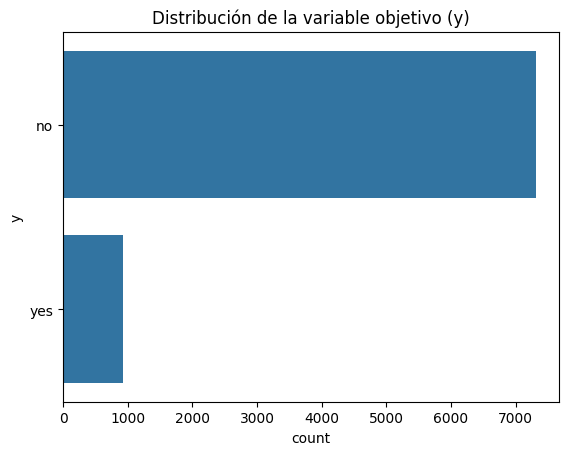

In [ ]:
sns.countplot(data['y'])
plt.title('Distribución de la variable objetivo (y)')
plt.show()

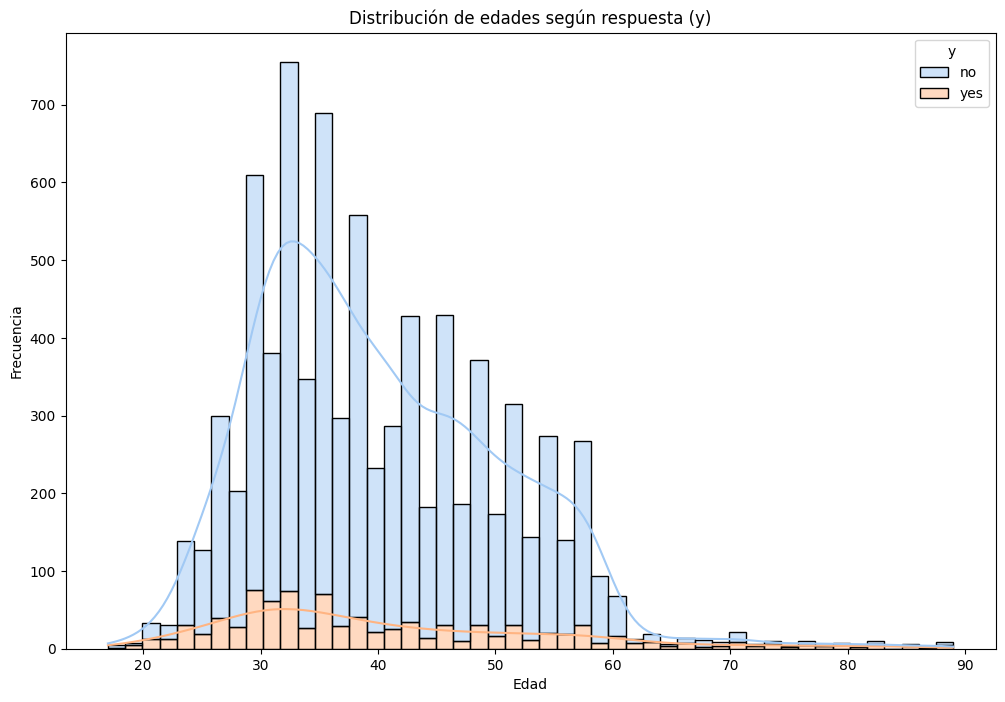

In [ ]:
#Análisis univariado de variables clave:

# Distribución de la edad por respuesta (y)
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='age', hue='y', multiple='stack', kde=True, palette="pastel")
plt.title("Distribución de edades según respuesta (y)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


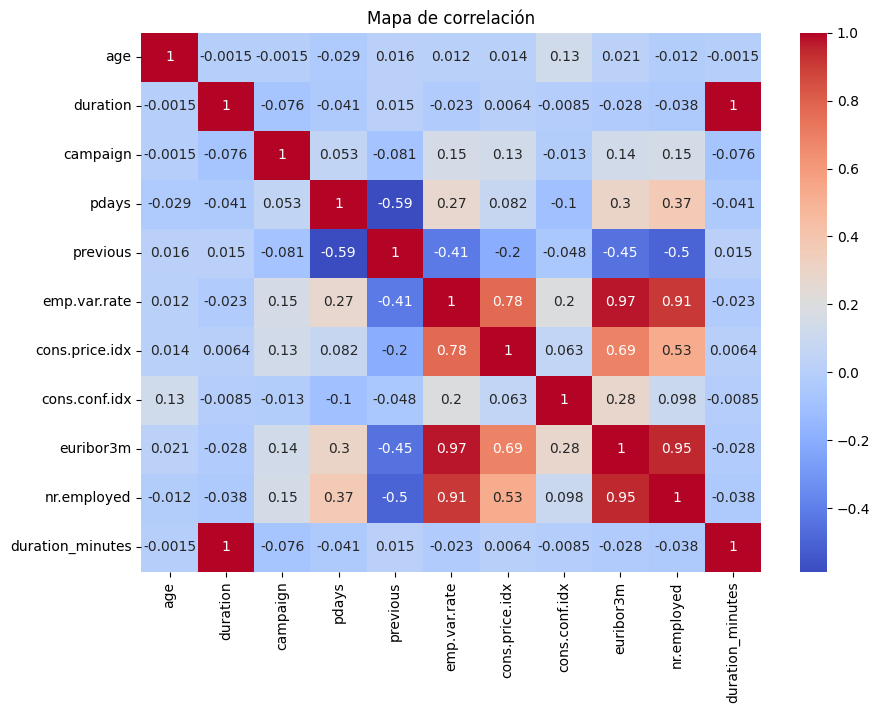

In [ ]:
#Correlaciones entre variables numéricas:

# Seleccionar solo columnas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
corr_matrix = numeric_cols.corr()

# Mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

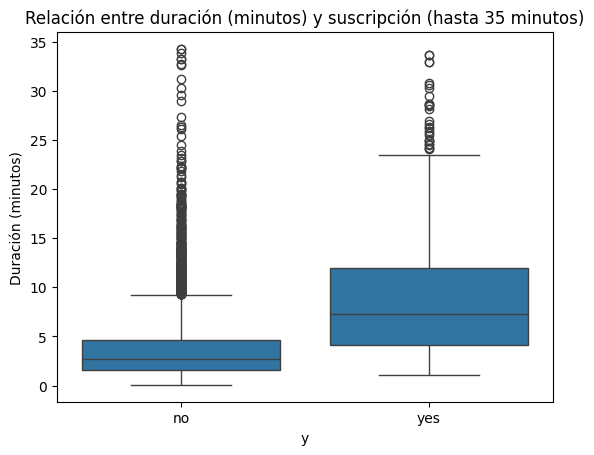

In [ ]:
# Filtrar las llamadas con duración máxima de 35 minutos (2100 segundos)
data_filtered = data[data['duration_minutes'] <= 35]

# Relación entre duración (en minutos) y suscripción
sns.boxplot(x='y', y='duration_minutes', data=data_filtered)
plt.title('Relación entre duración (minutos) y suscripción (hasta 35 minutos)')
plt.ylabel('Duración (minutos)')
plt.show()

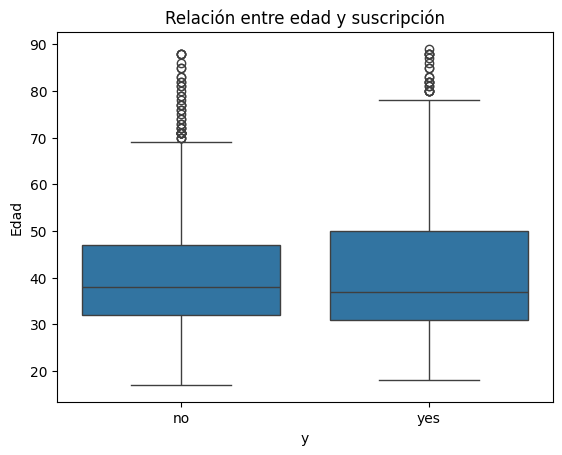

In [ ]:
# Relación entre duración (en minutos) y suscripción
sns.boxplot(x='y', y='age', data=data)
plt.title('Relación entre edad y suscripción')
plt.ylabel('Edad')
plt.show()

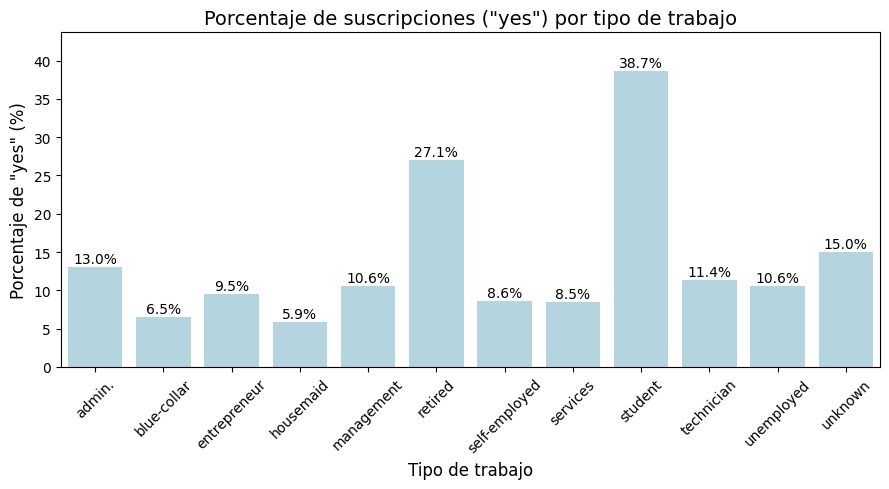

In [ ]:
# Calcular el total de registros por tipo de trabajo
job_totals = data['job'].value_counts()

# Calcular el total de "yes" por tipo de trabajo
job_yes_counts = data[data['y'] == 'yes']['job'].value_counts()

# Calcular el porcentaje de "yes" para cada tipo de trabajo
job_yes_percentage = (job_yes_counts / job_totals) * 100

# Crear el gráfico de barras
plt.figure(figsize=(9, 5))
sns.barplot(x=job_yes_percentage.index, y=job_yes_percentage.values, color='lightblue')

# Agregar los porcentajes encima de cada barra
for index, value in enumerate(job_yes_percentage.values):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10)

# Personalizar el gráfico
plt.title('Porcentaje de suscripciones ("yes") por tipo de trabajo', fontsize=14)
plt.xlabel('Tipo de trabajo', fontsize=12)
plt.ylabel('Porcentaje de "yes" (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, job_yes_percentage.max() + 5)  # Ajustar el rango del eje Y para mostrar bien los valores
plt.tight_layout()
plt.show()

# Paso 3: Modelo predictivo lineal (Regresión logística)

1. Preparar los datos:

In [ ]:
# Convertir variables categóricas en variables dummy.
# significa transformar las variables categóricas (aquellas que tienen valores como texto o categorías)
# en variables numéricas para que puedan ser procesadas por algoritmos de machine learning.
# Este proceso crea una nueva columna para cada categoría de la variable original, indicando con un 1 o un 0 si el registro pertenece a esa categoría.

data_encoded = pd.get_dummies(data, drop_first=True)

In [ ]:
#Dividir en características (X) y objetivo (y):
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

In [ ]:
#Dividir los datos en conjunto de entrenamiento y prueba:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2. Entrenar el modelo:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con datos escalados
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

3. Evaluar el modelo:

In [ ]:
y_pred = model.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))

Matriz de Confusión:
[[1325  877]
 [  42  228]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.97      0.60      0.74      2202
        True       0.21      0.84      0.33       270

    accuracy                           0.63      2472
   macro avg       0.59      0.72      0.54      2472
weighted avg       0.89      0.63      0.70      2472


Precisión del modelo:
0.6282362459546925


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


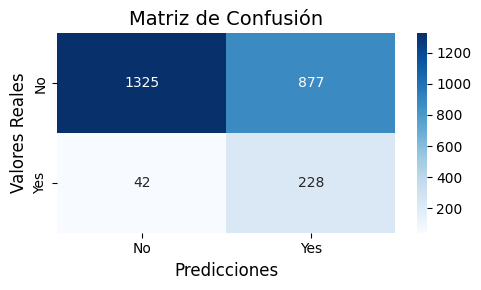

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes las etiquetas reales y predichas:
# y_test: Valores reales
# y_pred: Valores predichos por el modelo

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Predicciones', fontsize=12)
plt.ylabel('Valores Reales', fontsize=12)
plt.tight_layout()
plt.show()

# Conclusiones:

1. Los datos cargados contienen 8,237 registros y 21 columnas.

2. Variables categóricas como job, marital, education, etc., tienen valores como "admin.", "married", y "university.degree".

3. Variables numéricas como age, duration, campaign, y otras, tienen diferentes rangos y distribuciones.

4. La variable objetivo (y) tiene dos valores: "yes" y "no". La mayoría de los clientes no contrataron un depósito ("no").

5. Balance de la variable objetivo (y):

    El 88.73% de los clientes no contrataron un depósito ("no").
    El 11.27% sí contrataron un depósito ("yes").

6. Distribución de edades: Las edades están concentradas entre los 25 y 60 años.
Los clientes que dijeron "yes" están distribuidos en diferentes grupos de edad, con más frecuencia entre los 30 y 40 años.
Matriz de correlación:

7. Las variables euribor3m y nr.employed presentan una fuerte correlación con la variable emp.var.rate.
La variable duration (duración de la llamada) es fundamental para la predicción, pero podría necesitar normalización o transformación.
8. Respecto a Job quien tiene mayor porcventaje de decir "yes" son los estudiantes en un 38.7% seguido de los retirados con un 27.1 %
9. El reporte de la matriz de confusion muestra que el modelo tiene dificultades para identificar correctamente a los clientes que suscriben un depósito a plazo (clase True) debido al desbalance en los datos. Aunque el recall para la clase True es alto (84%), la precisión es baja (21%), lo que indica muchos falsos positivos. Además, el F1-score para esta clase es bajo (0.33), reflejando un desempeño limitado. La precisión global del modelo es del 62.8%, pero esto se debe a su fuerte sesgo hacia la clase mayoritaria (False).

FIN